Communications have evolved over the past years allowing people to constantly interact with others 24/7 no matter where you or the message/call receiver is located. Customers push Telecomunication organizations to compete between them to offer the best price and/or quality service. Hence, Telco companies must understand what drives customer churn and how to deal with it.

As a business analyst of a Communication Company, I will create models to predict the likelihood of churning of a particular client based on significant attributes that lead him/her to make the decision to go somewherelese. Furthermore, I will measure the financial implication of losing an existing client using an average of currently offered cellular plans to calculate the drop in sales and profit.

In [ ]:
#Import packages
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

The dataset was selected from IBM Business Analytics Community repository. It was posted on the 11th of July of 2019.

This data shows the information of a hypothetical telecommunications company located in California that conducted a study during the third quarter on 7,043 customers that have phone and/or internet services.However, I decided to focus our model solely on celullar packages and variables that can affect the percentage of client churning such as Contract type, Payment type, Paperless bill, Partner and Dependents.

https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [ ]:
#Load data
from google.colab import files
uploaded = files.upload()

import io
telco_data = pd.read_csv(io.BytesIO(uploaded['Telco-Customer-Churn.csv']))

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [ ]:
#Check variables in the study
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Check name of columns
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

There are 21 attributes.

Target variable => Churn= When a client stop having businesses with the company in the past month

Customer ID = Unique number to identify a particular client

Gender = Female or male

Senior Citizen = Classify the customer base in 65 or older Yes/No

Partner = It indicates if the account holder has a partner or no

Dependents = Specify if the main customer lives with dependents. Dependents include children, parents, grandparents, etc.

Tenure = States how many months the client has been with the company.

MultipleLines = Shows if the customer has more than one line in his/her account (EX. Family plans)

Contract = Explains the type of contract of a client (month to month, One year or Two years)

Paperless Billing = If the client is getting the bill online or not

Payment Method = Show how the client is paying: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)

Monthly Charges = the cost of the service per month

In [ ]:
#Drop Customer ID attribute because it does not add value to the study
telco_data = telco_data.drop(['customerID'],axis=1)

#Drop variables that are not related to cellular service
telco_data = telco_data.drop(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],axis=1)

<Axes: >

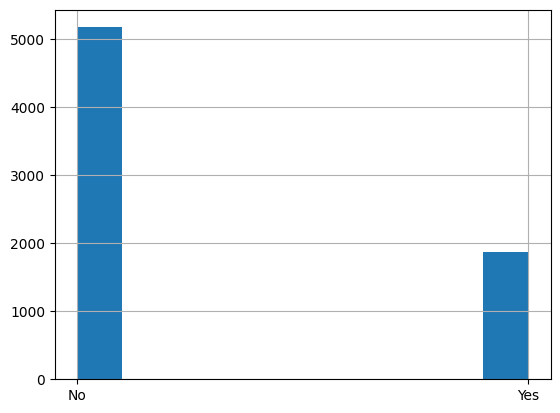

In [ ]:
# Evaluate target variable distribution
telco_data.Churn.hist()

The target variable is churn, this attribute tells us if a client has left the company in the past month.

In this research, the number of clients that did not churn is almost three times the number of customers that churned.

In [ ]:
#Classify target variable into 1(churned) or 0(not churned)
telco_data.loc[telco_data['Churn'] == "Yes", 'Churn'] = 1
telco_data.loc[telco_data['Churn'] == "No", 'Churn'] = 0

In [ ]:
# Evaluate target variable percentage distribution
telco_data.Churn.mean()

0.2653698707936959

Only 26.5% of the data collected is showing people that churned.



In [ ]:
telco_data.std()

<ipython-input-9-ee0f9e845f22>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  telco_data.std()


SeniorCitizen        0.368612
tenure              24.559481
MonthlyCharges      30.090047
TotalCharges      2266.730170
Churn                0.441561
dtype: float64

In [ ]:
#Drop TotalCharges attribute because it may cause innaccuracy due to the high deviation caused by the type of contract of every client
telco_data = telco_data.drop(['TotalCharges'],axis=1)

<Axes: >

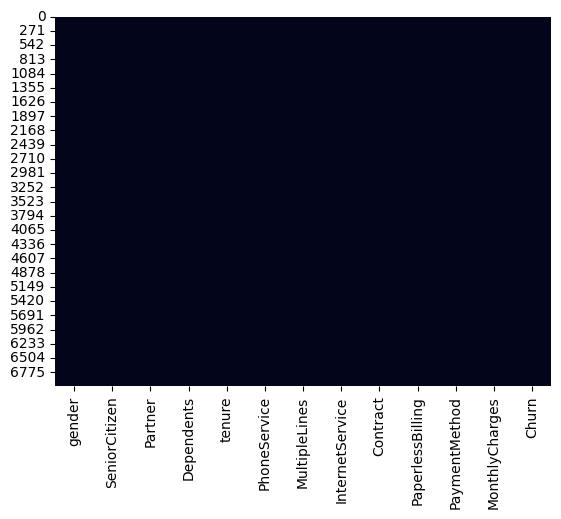

In [ ]:
# Examine missing values
sns.heatmap(telco_data.isnull(), cbar=False)

There are no missing values in the dataset

In [ ]:
#Classify other variables into 1 (Yes) or 0 (No)
telco_data.loc[telco_data['Partner'] == "Yes", 'Partner'] = 1
telco_data.loc[telco_data['Partner'] == "No", 'Partner'] = 0

telco_data.loc[telco_data['Dependents'] == "Yes", 'Dependents'] = 1
telco_data.loc[telco_data['Dependents'] == "No", 'Dependents'] = 0

telco_data.loc[telco_data['PhoneService'] == "Yes", 'PhoneService'] = 1
telco_data.loc[telco_data['PhoneService'] == "No", 'PhoneService'] = 0

telco_data.loc[telco_data['PaperlessBilling'] == "Yes", 'PaperlessBilling'] = 1
telco_data.loc[telco_data['PaperlessBilling'] == "No", 'PaperlessBilling'] = 0

In [ ]:
#Analyze data type of every attribute
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   Contract          7043 non-null   object 
 9   PaperlessBilling  7043 non-null   object 
 10  PaymentMethod     7043 non-null   object 
 11  MonthlyCharges    7043 non-null   float64
 12  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 715.4+ KB


In [ ]:
# Verify how many levels are in the variable
telco_data['Partner'].unique()

array([1, 0], dtype=object)

In [ ]:
#Correct data type
telco_data['Churn'] =  telco_data['Churn'].astype('int64',copy=False)
telco_data['Partner'] =  telco_data['Partner'].astype('int64',copy=False)
telco_data['Dependents'] =  telco_data['Dependents'].astype('int64',copy=False)
telco_data['PhoneService'] =  telco_data['PhoneService'].astype('int64',copy=False)
telco_data['PaperlessBilling'] =  telco_data['PaperlessBilling'].astype('int64',copy=False)

In [ ]:
#Verify that all the attributes have the correct data type
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   Contract          7043 non-null   object 
 9   PaperlessBilling  7043 non-null   int64  
 10  PaymentMethod     7043 non-null   object 
 11  MonthlyCharges    7043 non-null   float64
 12  Churn             7043 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 715.4+ KB


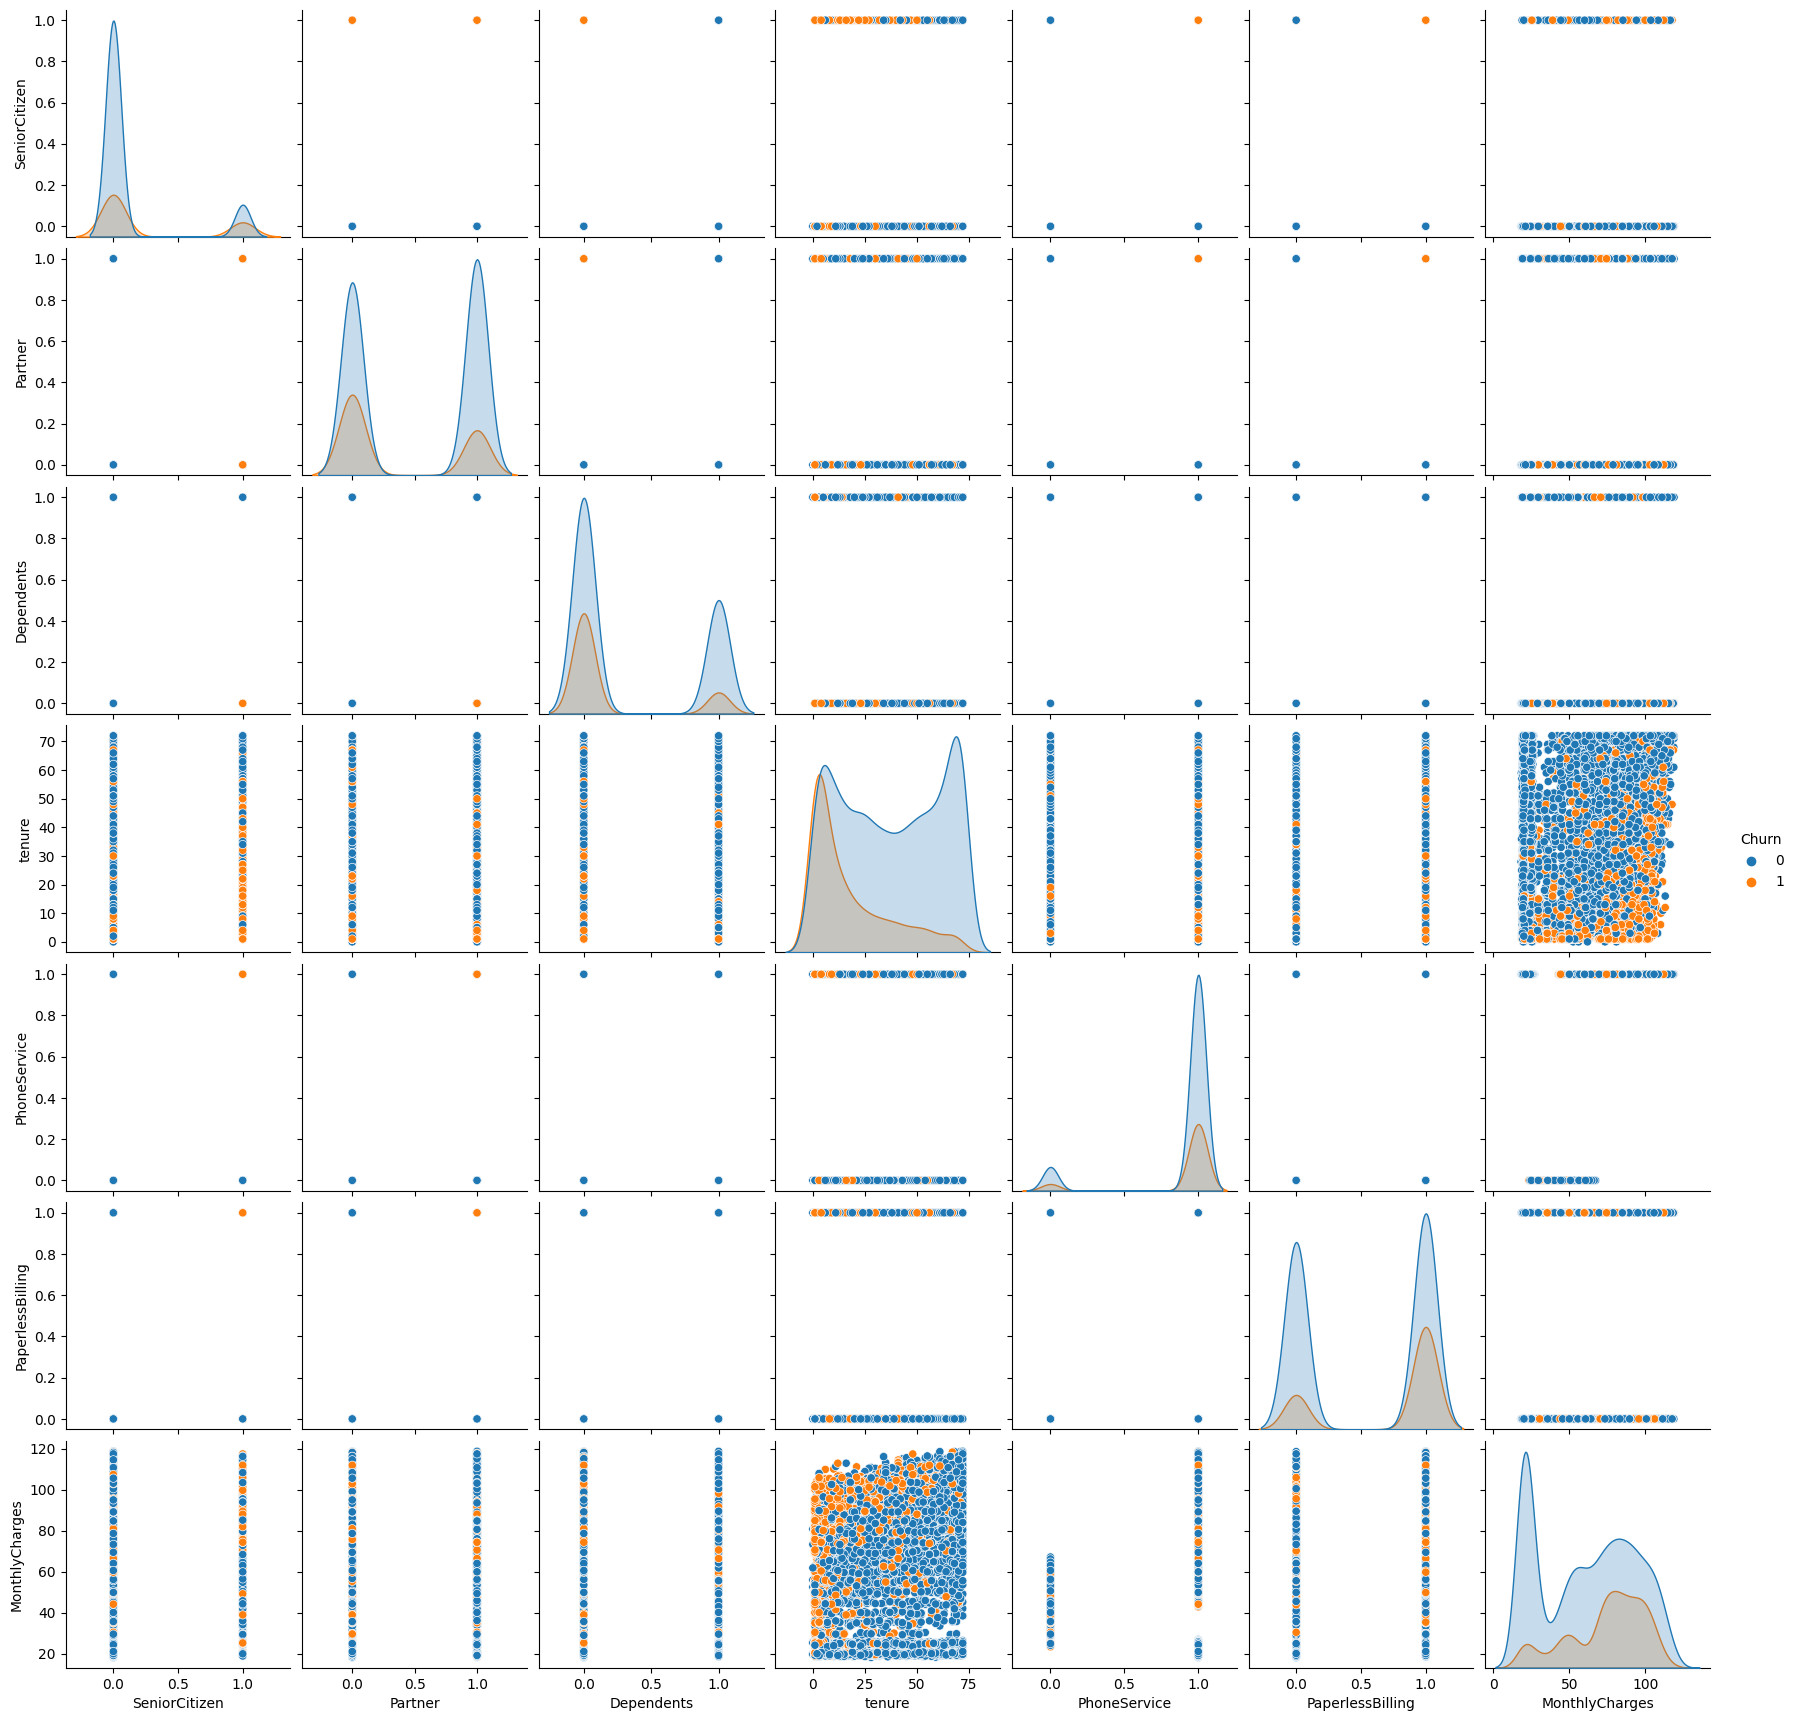

In [ ]:
#Examine relationships
sns.pairplot(telco_data, hue = 'Churn')

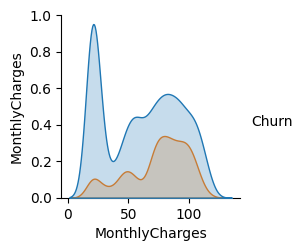

In [ ]:
sns.pairplot(telco_data[['MonthlyCharges','Churn']], hue = 'Churn')

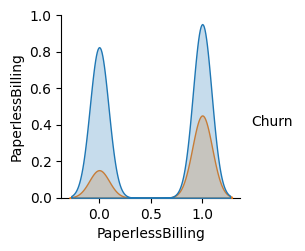

In [ ]:
sns.pairplot(telco_data[['PaperlessBilling','Churn']], hue = 'Churn')

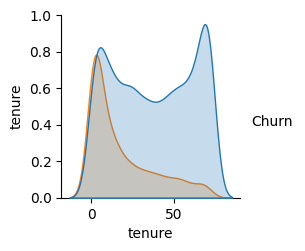

In [ ]:
sns.pairplot(telco_data[['tenure','Churn']], hue = 'Churn')

When the customer is not a Senior Citizen there is a lower chance of churning than when they are senior citizens (almost 50/50).

The likelihood that a customer churns increase when they do not have partners or dependents.

Customer accounts with tenure levels between 0 and 5 are more likely to churn.

When the client has phone service included and decided to have paperless billing there is a higher probability of churning.

The likelihood of churning increase at the same time monthly charges raise.


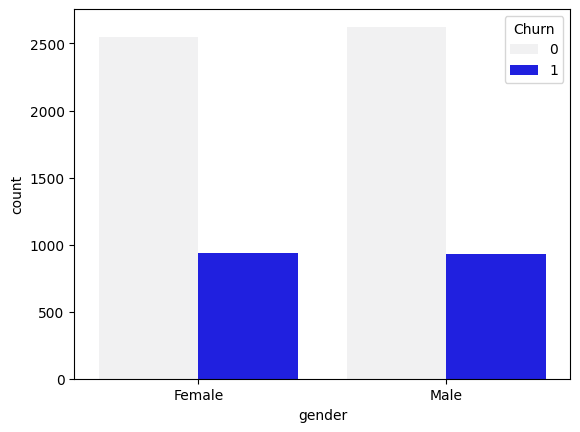

In [ ]:
gc = sns.countplot(x='gender', hue = 'Churn', data = telco_data, color = 'blue')

Gender does not influence the customer decision of churning

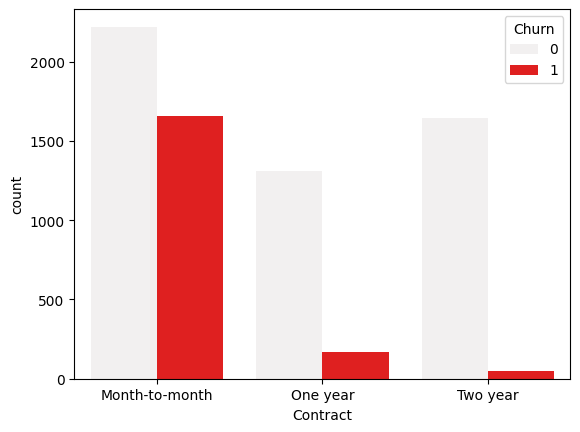

In [ ]:
cc = sns.countplot(x='Contract', hue = 'Churn', data = telco_data, color = 'red')

Clients with month to month contract will be more likely to churn than one year or two year contract customers.

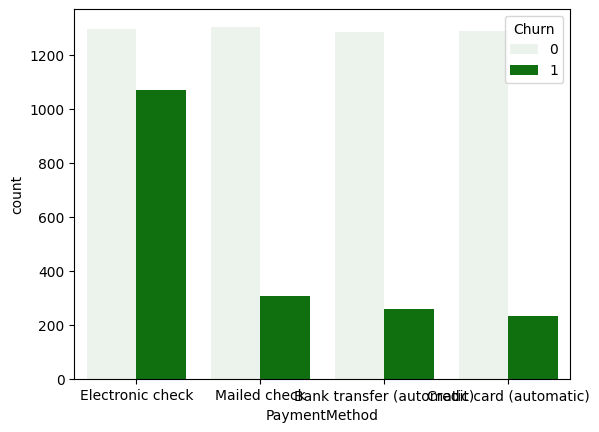

In [ ]:
pc = sns.countplot(x='PaymentMethod', hue = 'Churn', data = telco_data, color = 'green')

People paying by electronic check have higher likelihood of churning than any other payment method.

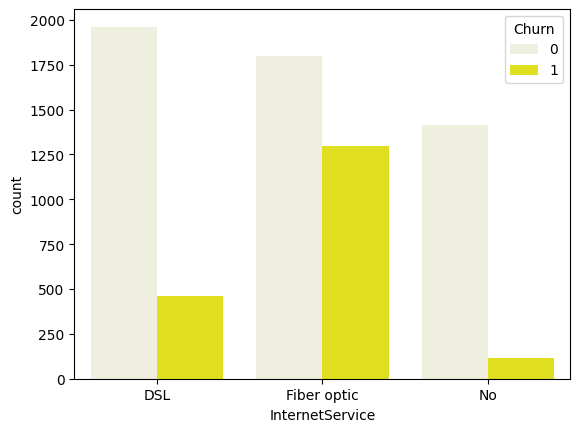

In [ ]:
ic = sns.countplot(x='InternetService', hue = 'Churn', data = telco_data, color = 'yellow')

Clients with Fiber Optic service are more likely to churn than people with DSL or no internet service.

In [ ]:
#Get dummies for categorical variables
telco_data = pd.get_dummies(telco_data, drop_first=True)

In [ ]:
#Analyze updated dataset
telco_data.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,0.265370,0.504756,0.096834,0.421837,0.439585,0.216669,0.209144,0.240664,0.216101,0.335794,0.228880
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,0.441561,0.500013,0.295752,0.493888,0.496372,0.412004,0.406726,0.427517,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are 18 attributes due to the dummy variables obtained from the categorical features.

**Calculate loss > Find average cost of cellular plan from (AT&T, T-MOBILE &Verizon)**

An unlimited voice and text plan at T-Mobile costs 60.00 per month for 1 line or $105 per month for up to 4 lines.

An unlimited voice and text plan at AT&T costs 65.00 per month for 1 line or $140 for up to 4 lines.

An unlimited voice and text plan at Verizon costs 60.00 per month for 1 line or $100 for up to 4 lines.

Taxes and fees are extra depending on State.

I am going to use the average price between those three providers (These are the biggest in the country) to calculate the loss.

https://clark.com/technology/att-verizon-t-mobile-sprint-unlimited-plans-comparison/



In [ ]:
#Evaluate how many clients churned in the past month
telco_data[telco_data['Churn']==1].count()

SeniorCitizen                            1869
Partner                                  1869
Dependents                               1869
tenure                                   1869
PhoneService                             1869
PaperlessBilling                         1869
MonthlyCharges                           1869
Churn                                    1869
gender_Male                              1869
MultipleLines_No phone service           1869
MultipleLines_Yes                        1869
InternetService_Fiber optic              1869
InternetService_No                       1869
Contract_One year                        1869
Contract_Two year                        1869
PaymentMethod_Credit card (automatic)    1869
PaymentMethod_Electronic check           1869
PaymentMethod_Mailed check               1869
dtype: int64

In the past month 1869 clients churned.

In [ ]:
#Identify how many clients that churned had multiple lines
churn_multiple=telco_data[((telco_data['MultipleLines_Yes']==1) & (telco_data['Churn']==1))].count()

In [ ]:
churn_multiple

SeniorCitizen                            850
Partner                                  850
Dependents                               850
tenure                                   850
PhoneService                             850
PaperlessBilling                         850
MonthlyCharges                           850
Churn                                    850
gender_Male                              850
MultipleLines_No phone service           850
MultipleLines_Yes                        850
InternetService_Fiber optic              850
InternetService_No                       850
Contract_One year                        850
Contract_Two year                        850
PaymentMethod_Credit card (automatic)    850
PaymentMethod_Electronic check           850
PaymentMethod_Mailed check               850
dtype: int64

From the clients that churned, 850 had multiple lines.

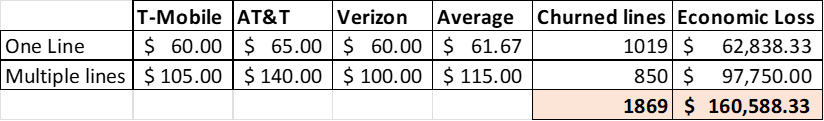

The company lost 160,588.33 dollars in the past month when 1,869 clients decided to end businesses with us.

In [ ]:
#Create variables X and Y for Logistic regression Model
X = telco_data.drop('Churn', axis=1)
Y = telco_data['Churn']

#Rescale the data for analysis
scaler = MinMaxScaler()
X_= scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_, columns=X.columns)

# Split data 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
#Build logistic regression model
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,Y_train)

Y_pred = logmodel.predict(X_test)

In [ ]:
#Confusion matrix
confusion_matrix(Y_test,Y_pred)

array([[1412,  173],
       [ 229,  299]])

There are 1412 True positive values, 173 false positive, 229 False negative and 299 True negative.

In [ ]:
#Accuracy, Recall and Precision
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1585
           1       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



In [ ]:
logmodel.coef_

array([[ 0.30761612,  0.02813347, -0.07916691, -0.03689831, -0.60971963,
         0.32885502,  0.00770414,  0.01951115,  0.01663105,  0.33195785,
         0.80955934, -0.41245259, -0.66972903, -1.37761387, -0.06789862,
         0.37258161, -0.04121579]])

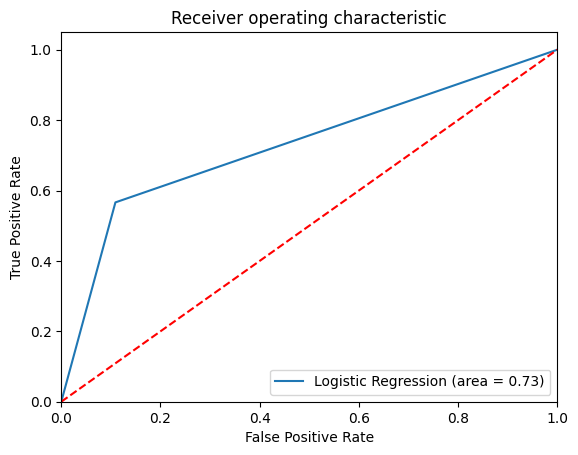

In [ ]:
#ROC AUC
logit_roc_auc = roc_auc_score(Y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logmodel.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
logit_roc_auc

0.7285698069018258

In [ ]:
#Evaluate model to determine which features have no effect on the Outcome
import statsmodels.api as sm
logit_model=sm.Logit(Y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.430493
         Iterations 8
                                    Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.264    
Dependent Variable:         Churn                   AIC:                     4278.6586
Date:                       2023-04-19 20:13        BIC:                     4389.2112
No. Observations:           4930                    Log-Likelihood:          -2122.3  
Df Model:                   16                      LL-Null:                 -2885.3  
Df Residuals:               4913                    LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             8.0000                                                    
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     

'Partner','Dependents','gender_Male','InternetService_No', 'PaymentMethod_Credit card (automatic)' and 'PaymentMethod_Mailed check'are not statistically significant variables and should be removed from the model.

In [ ]:
#Drop insignificant variables
telco_data = telco_data.drop(['Partner','Dependents','gender_Male','InternetService_No', 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check'],axis=1)

In [ ]:
#Rebuild Logistic Regression Model
X = telco_data.drop('Churn', axis=1)
Y = telco_data['Churn']

#Rescale the data for analysis
scaler = MinMaxScaler()
X_= scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_, columns=X.columns)

# Split data 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#Build logistic regression model with statistically significant variables
slogmodel = LogisticRegression(solver='liblinear')

slogmodel.fit(X_train,Y_train)

Y_pred = slogmodel.predict(X_test)

In [ ]:
#Updated Confusion matrix for the Logistic Regression Model
confusion_matrix(Y_test,Y_pred)

array([[1413,  172],
       [ 227,  301]])

There are 1413 True positive values, 172 false positive, 227 False negative and 301 True negative.
Removing the insignificant variables helped the model to increment the number of True positives and True negative values by one and two units respectively.

In [ ]:
#Updated Accuracy, Recall and Precision for the Logistic Regression
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1585
           1       0.64      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113



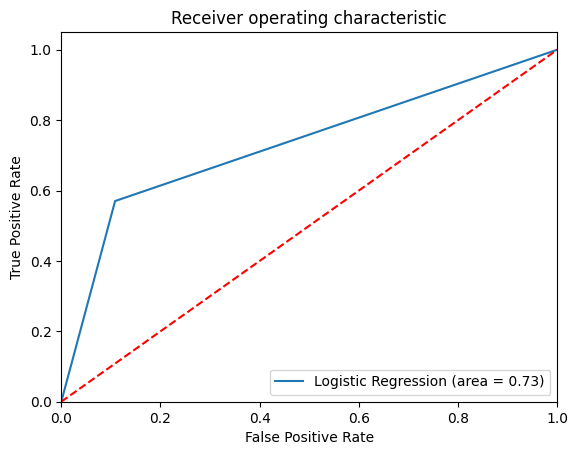

In [ ]:
#ROC AUC
slogit_roc_auc = roc_auc_score(Y_test, slogmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, slogmodel.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
slogit_roc_auc

0.7307792037090145

The ROC increased by 0.0022 using the statistically significant variables.

In [ ]:
#Evaluate updated logistic regression model
logit_model=sm.Logit(Y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.430818
         Iterations 8
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.264    
Dependent Variable:      Churn                 AIC:                   4269.8676
Date:                    2023-04-19 20:13      BIC:                   4341.4016
No. Observations:        4930                  Log-Likelihood:        -2123.9  
Df Model:                10                    LL-Null:               -2885.3  
Df Residuals:            4919                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          8.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

All the variables are now statistically significant

In [ ]:
#Reload data to create KNN model
import io
telco_data = pd.read_csv(io.BytesIO(uploaded['Telco-Customer-Churn.csv']))

In [ ]:
#Drop Customer ID and TotalCharges attributes because they do not add value to the study
telco_data = telco_data.drop(['customerID', 'TotalCharges'],axis=1)

#Drop variables that are not related to cellular service
telco_data = telco_data.drop(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],axis=1)

#Classify target variable into 1(churned) or 0(not churned)
telco_data.loc[telco_data['Churn'] == "Yes", 'Churn'] = 1
telco_data.loc[telco_data['Churn'] == "No", 'Churn'] = 0

#Classify other variables into 1 (Yes) or 0 (No)
telco_data.loc[telco_data['Partner'] == "Yes", 'Partner'] = 1
telco_data.loc[telco_data['Partner'] == "No", 'Partner'] = 0

telco_data.loc[telco_data['Dependents'] == "Yes", 'Dependents'] = 1
telco_data.loc[telco_data['Dependents'] == "No", 'Dependents'] = 0

telco_data.loc[telco_data['PhoneService'] == "Yes", 'PhoneService'] = 1
telco_data.loc[telco_data['PhoneService'] == "No", 'PhoneService'] = 0

telco_data.loc[telco_data['PaperlessBilling'] == "Yes", 'PaperlessBilling'] = 1
telco_data.loc[telco_data['PaperlessBilling'] == "No", 'PaperlessBilling'] = 0

In [ ]:
#Correct data type
telco_data['Churn'] =  telco_data['Churn'].astype('int64',copy=False)
telco_data['Partner'] =  telco_data['Partner'].astype('int64',copy=False)
telco_data['Dependents'] =  telco_data['Dependents'].astype('int64',copy=False)
telco_data['PhoneService'] =  telco_data['PhoneService'].astype('int64',copy=False)
telco_data['PaperlessBilling'] =  telco_data['PaperlessBilling'].astype('int64',copy=False)

In [ ]:
#Get dummies for categorical variables
telco_data = pd.get_dummies(telco_data, drop_first=True)

In [ ]:
#Rescale the data for analysis
X = telco_data.drop('Churn', axis=1)
Y = telco_data['Churn']

scaler = MinMaxScaler()
X_= scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [ ]:
X_rescaled.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,0.449599,0.903166,0.592219,0.462803,0.504756,0.096834,0.421837,0.439585,0.216669,0.209144,0.240664,0.216101,0.335794,0.228880
std,0.368612,0.499748,0.458110,0.341104,0.295752,0.491457,0.299403,0.500013,0.295752,0.493888,0.496372,0.412004,0.406726,0.427517,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.171642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.402778,1.000000,1.000000,0.518408,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,0.712438,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the values are now between 0-1 hence the data is scaled.

In [ ]:
# Split data 70/30
X_train, X_test, Y_train, Y_test= train_test_split(X_rescaled, Y, test_size=0.3, random_state=1)

In [ ]:
#Develop KNN Model
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_test)

print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))

[[1351  234]
 [ 244  284]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1585
           1       0.55      0.54      0.54       528

    accuracy                           0.77      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113



There are 1351 True positive values, 234 False positive, 244 False negative and 284 True negative. Furthermore, the accuracy rate is 77%

In [ ]:
#ROC AUC
print('ROC AUC:', roc_auc_score(Y_test, Y_pred))

ROC AUC: 0.6951223592390784


The area under the curve is 0.70. The data needs other variables with more informative knowledge to make more accurate predictions when a client churns.

In [ ]:
#Assess value of K
max_K = 100
cv_scores = []

for k in range(1,max_K):
  knn = KNeighborsClassifier(n_neighbors = k)
  scores= cross_val_score(knn,X_train, Y_train.values.ravel(), cv = 5, scoring="roc_auc")
  cv_scores.append(scores.mean())

selected_k=cv_scores.index(max(cv_scores))+1

In [ ]:
print('Optimal k: ' , cv_scores.index(max(cv_scores))+1)

Optimal k:  81


<Axes: >

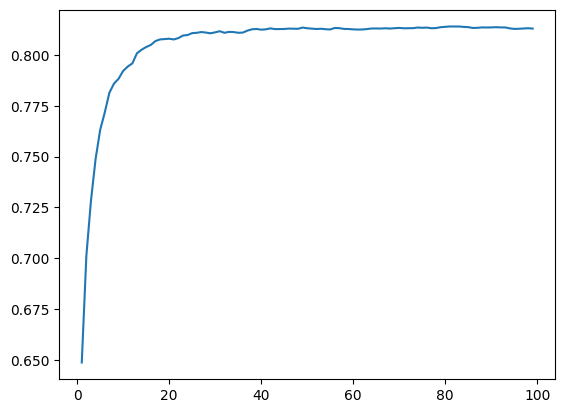

In [ ]:
sns.lineplot(x=range(1,max_K), y=cv_scores)

The highest ROC is at a K of 81. From 1-80 K start increasing until reaching the peak at 81 K, after that the area under the curve shows a small decrease and becomes stable all the way to 100 K when the boundaries of the dataset are starting to be pushed.


This indicates that the best way of predicting if a client will churn is finding the 81 reference points of the dataset (current cases) with similar characteristics.

In [ ]:
#Build Optimized Knn Model
X_train, X_test, Y_train, Y_test= train_test_split(X_rescaled, Y, test_size=0.3, random_state=1)

knnopt = KNeighborsClassifier(n_neighbors=81, metric= 'euclidean')
knnopt.fit(X_train,Y_train)

Y_pred = knnopt.predict(X_test)

print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))

[[1402  183]
 [ 242  286]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1585
           1       0.61      0.54      0.57       528

    accuracy                           0.80      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



There are 1402 True positive values, 183 False positive, 242 False negative and 286 True negative. Furthermore, the accuracy rate is 80%

In [ ]:
#Optimized Knn ROC AUC
print('ROC AUC:', roc_auc_score(Y_test, Y_pred))

ROC AUC: 0.7131046267087277


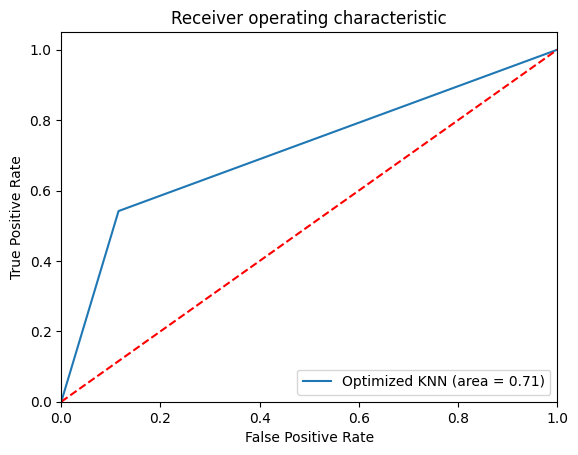

In [ ]:
#ROC Optimized KNN
knnopt_roc_auc = roc_auc_score(Y_test, knnopt.predict(X_test))
knnopt_fpr, knnopt_tpr, knnopt_thresholds = roc_curve(Y_test, knnopt.predict(X_test))

plt.figure()
plt.plot(knnopt_fpr, knnopt_tpr, label='Optimized KNN (area = %0.2f)' % knnopt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Reload data to create Tree models
import io
telco_data = pd.read_csv(io.BytesIO(uploaded['Telco-Customer-Churn.csv']))

In [ ]:
#Drop Customer ID attribute and Total Charges because they do not add value to the study
telco_data = telco_data.drop(['customerID', 'TotalCharges'],axis=1)

#Drop variables that are not related to cellular service
telco_data = telco_data.drop(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],axis=1)

#Classify target variable into 1(churned) or 0(not churned)
telco_data.loc[telco_data['Churn'] == "Yes", 'Churn'] = 1
telco_data.loc[telco_data['Churn'] == "No", 'Churn'] = 0

#Classify other variables into 1 (Yes) or 0 (No)
telco_data.loc[telco_data['Partner'] == "Yes", 'Partner'] = 1
telco_data.loc[telco_data['Partner'] == "No", 'Partner'] = 0

telco_data.loc[telco_data['Dependents'] == "Yes", 'Dependents'] = 1
telco_data.loc[telco_data['Dependents'] == "No", 'Dependents'] = 0

telco_data.loc[telco_data['PhoneService'] == "Yes", 'PhoneService'] = 1
telco_data.loc[telco_data['PhoneService'] == "No", 'PhoneService'] = 0

telco_data.loc[telco_data['PaperlessBilling'] == "Yes", 'PaperlessBilling'] = 1
telco_data.loc[telco_data['PaperlessBilling'] == "No", 'PaperlessBilling'] = 0

In [ ]:
#Correct data type
telco_data['Churn'] =  telco_data['Churn'].astype('int64',copy=False)
telco_data['Partner'] =  telco_data['Partner'].astype('int64',copy=False)
telco_data['Dependents'] =  telco_data['Dependents'].astype('int64',copy=False)
telco_data['PhoneService'] =  telco_data['PhoneService'].astype('int64',copy=False)
telco_data['PaperlessBilling'] =  telco_data['PaperlessBilling'].astype('int64',copy=False)

In [ ]:
#Get dummies for categorical variables
telco_data = pd.get_dummies(telco_data, drop_first=True)

In [ ]:
#Create variables X and Y for the tree models
X = telco_data.drop('Churn', axis=1)
Y = telco_data['Churn']

#Rescale the data for analysis
scaler = MinMaxScaler()
X_= scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [ ]:
# Split data 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
#Create Random Forest Model
rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,Y_train)

Y_pred_rf = rf_model.predict(X_test)

confusion_matrix(Y_test,Y_pred_rf)

array([[1467,  118],
       [ 292,  236]])

There are 1467 True positives, 118 False positives, 292 False negatives and 236 True negatives.

In [ ]:
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1585
           1       0.67      0.45      0.54       528

    accuracy                           0.81      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.79      0.81      0.79      2113



In [ ]:
# Create Boosted tree model

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,Y_train)

Y_pred_bt = bt_model.predict(X_test)

confusion_matrix(Y_test,Y_pred_bt)

array([[1417,  168],
       [ 235,  293]])

There are 1417 True positive values, 168 False positives, 235 False negatives and 293 True negatives.

In [ ]:
print(classification_report(Y_test,Y_pred_bt))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1585
           1       0.64      0.55      0.59       528

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



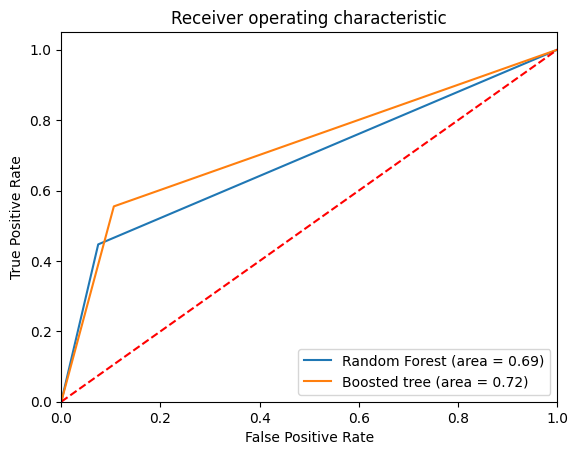

In [ ]:
# ROC Random Forest
rf_roc_auc = roc_auc_score(Y_test, rf_model.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, rf_model.predict(X_test))

# ROC Boosted Tree
bt_roc_auc = roc_auc_score(Y_test, bt_model.predict(X_test))
bt_fpr, bt_tpr, bt_thresholds = roc_curve(Y_test, bt_model.predict(X_test))

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
rf_roc_auc

0.6862608737214416

In [ ]:
bt_roc_auc

0.7244652757862537

The ROC value for the Random Forest Model is 0.69 and for the Boosted Tree Model is 0.72

In [ ]:
#Reload data to create Naive Bayes model
import io
telco_data = pd.read_csv(io.BytesIO(uploaded['Telco-Customer-Churn.csv']))

In [ ]:
#Drop Customer ID attribute and TotalCharges because they do not add value to the study
telco_data = telco_data.drop(['customerID', 'TotalCharges'],axis=1)

#Drop variables that are not related to cellular service
telco_data = telco_data.drop(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],axis=1)

#Classify target variable into 1(churned) or 0(not churned)
telco_data.loc[telco_data['Churn'] == "Yes", 'Churn'] = 1
telco_data.loc[telco_data['Churn'] == "No", 'Churn'] = 0

#Classify other variables into 1 (Yes) or 0 (No)
telco_data.loc[telco_data['Partner'] == "Yes", 'Partner'] = 1
telco_data.loc[telco_data['Partner'] == "No", 'Partner'] = 0

telco_data.loc[telco_data['Dependents'] == "Yes", 'Dependents'] = 1
telco_data.loc[telco_data['Dependents'] == "No", 'Dependents'] = 0

telco_data.loc[telco_data['PhoneService'] == "Yes", 'PhoneService'] = 1
telco_data.loc[telco_data['PhoneService'] == "No", 'PhoneService'] = 0

telco_data.loc[telco_data['PaperlessBilling'] == "Yes", 'PaperlessBilling'] = 1
telco_data.loc[telco_data['PaperlessBilling'] == "No", 'PaperlessBilling'] = 0

In [ ]:
#Correct data type
telco_data['Churn'] =  telco_data['Churn'].astype('int64',copy=False)
telco_data['Partner'] =  telco_data['Partner'].astype('int64',copy=False)
telco_data['Dependents'] =  telco_data['Dependents'].astype('int64',copy=False)
telco_data['PhoneService'] =  telco_data['PhoneService'].astype('int64',copy=False)
telco_data['PaperlessBilling'] =  telco_data['PaperlessBilling'].astype('int64',copy=False)

In [ ]:
#Create variables X and Y for Naive Bayes model
X = pd.get_dummies(telco_data.drop('Churn', axis=1))
Y = telco_data['Churn']

#Rescale the data for analysis
scaler = MinMaxScaler()
X_= scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [ ]:
X.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,gender_Female,gender_Male,MultipleLines_No,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,0.495244,0.504756,0.481329,...,0.343746,0.439585,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,0.500013,0.500013,0.499687,...,0.474991,0.496372,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Verify there is no null columns
X.loc[:, X.isnull().any()].columns

Index([], dtype='object')

In [ ]:
# Split data 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
#Build Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, Y_train)

Y_pred = delays_nb.predict(X_test)

print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1129  456]
 [ 116  412]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1585
           1       0.47      0.78      0.59       528

    accuracy                           0.73      2113
   macro avg       0.69      0.75      0.69      2113
weighted avg       0.80      0.73      0.75      2113



There are 1129 True positive values, 456 False positives, 116 False negatives and 412 True negatives.

In [ ]:
delays_nb.n_features_in_

22

We have 22 attributes to measure churning likelihood.

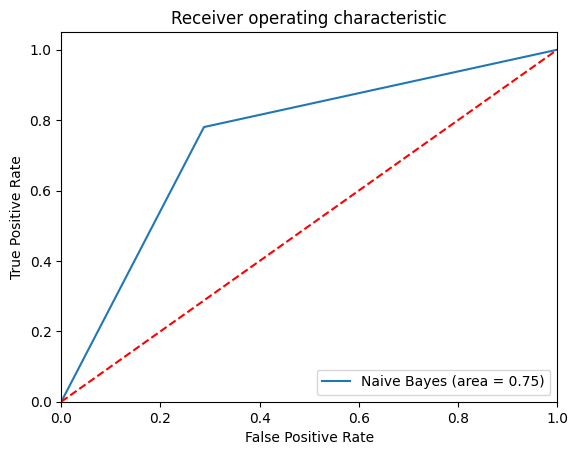

In [ ]:
nb_roc_auc = roc_auc_score(Y_test, delays_nb.predict(X_test))
nb_fpr, nb_tpr, nb_thresholds = roc_curve(Y_test, delays_nb.predict(X_test))

plt.figure()
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
nb_roc_auc

0.7463029347098747

ROC is 0.75

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(delays_nb, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=e2cbd9dbf532552de01a01d1013a2ad7b41b7b75e257a6d2954fb02df6437930
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


Weight,Feature
0.1368 ± 0.0162,tenure
0.0522 ± 0.0071,MonthlyCharges
0.0018 ± 0.0016,PaymentMethod_Electronic check
0.0018 ± 0.0017,InternetService_Fiber optic
0.0015 ± 0.0035,InternetService_No
0.0012 ± 0.0018,SeniorCitizen
0.0010 ± 0.0028,Contract_One year
0.0003 ± 0.0013,PaperlessBilling
0.0003 ± 0.0010,PaymentMethod_Credit card (automatic)
0.0002 ± 0.0005,gender_Male


Tenure is the feature that creates the highest impact on determining if a customer will churn or not. Monthly charges, Internet service_No, InternetService_Fiber optic and PaymentMethod_Electronic check attributes also play a key role to weight churning probability.

In [ ]:
#Reload data to create MLP Classifier
import io
telco_data = pd.read_csv(io.BytesIO(uploaded['Telco-Customer-Churn.csv']))

In [ ]:
#Drop Customer ID attribute and TotalCharges because they do not add value to the study
telco_data = telco_data.drop(['customerID', 'TotalCharges'],axis=1)

#Drop variables that are not related to cellular service
telco_data = telco_data.drop(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],axis=1)

#Classify target variable into 1(churned) or 0(not churned)
telco_data.loc[telco_data['Churn'] == "Yes", 'Churn'] = 1
telco_data.loc[telco_data['Churn'] == "No", 'Churn'] = 0

#Classify other variables into 1 (Yes) or 0 (No)
telco_data.loc[telco_data['Partner'] == "Yes", 'Partner'] = 1
telco_data.loc[telco_data['Partner'] == "No", 'Partner'] = 0

telco_data.loc[telco_data['Dependents'] == "Yes", 'Dependents'] = 1
telco_data.loc[telco_data['Dependents'] == "No", 'Dependents'] = 0

telco_data.loc[telco_data['PhoneService'] == "Yes", 'PhoneService'] = 1
telco_data.loc[telco_data['PhoneService'] == "No", 'PhoneService'] = 0

telco_data.loc[telco_data['PaperlessBilling'] == "Yes", 'PaperlessBilling'] = 1
telco_data.loc[telco_data['PaperlessBilling'] == "No", 'PaperlessBilling'] = 0

In [ ]:
#Correct data type
telco_data['Churn'] =  telco_data['Churn'].astype('int64',copy=False)
telco_data['Partner'] =  telco_data['Partner'].astype('int64',copy=False)
telco_data['Dependents'] =  telco_data['Dependents'].astype('int64',copy=False)
telco_data['PhoneService'] =  telco_data['PhoneService'].astype('int64',copy=False)
telco_data['PaperlessBilling'] =  telco_data['PaperlessBilling'].astype('int64',copy=False)

In [ ]:
#Get dummies for categorical variables
telco_data = pd.get_dummies(telco_data)

In [ ]:
#Analyze updated dataset
telco_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.0,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.0,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.0,1.00,1.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.0,1.00,1.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
Churn,7043.0,0.265370,0.441561,0.00,0.0,0.00,1.00,1.00
gender_Female,7043.0,0.495244,0.500013,0.00,0.0,0.00,1.00,1.00
gender_Male,7043.0,0.504756,0.500013,0.00,0.0,1.00,1.00,1.00


In [ ]:
#Find correlation between the target variable and the rest of the attributes
telco_data.corr()['Churn'].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
MultipleLines_Yes                          0.040102
PhoneService                               0.011942
gender_Female                              0.008612
gender_Male                               -0.008612
MultipleLines_No phone service            -0.011942
MultipleLines_No                          -0.032569
PaymentMethod_Mailed check                -0.091683
PaymentMethod_Bank transfer (automatic)   -0.117937
InternetService_DSL                       -0.124214
PaymentMethod_Credit card (automatic)     -0.134302
Partner                                   -0.150448
Dependents                                -0.164221
Contract_One

The most correlated attributes with the target variable 'Churn' are Contract_Month-to-month, InternetService_Fiber optic, PaymentMethod_Electronic check, tenure, Contract_Two year, InternetService_No

In [ ]:
#Create X and y variables
X = telco_data.drop('Churn', axis=1)
Y = telco_data['Churn']

In [ ]:
# Split data 70/30 and rescaled it
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Verify data is rescaled and analyzed variables
X_train_df = pd.DataFrame(X_train, columns = X.columns)

X_train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,4930.0,0.162069,0.368551,0.0,0.000000,0.000000,0.000000,1.0
Partner,4930.0,0.475862,0.499468,0.0,0.000000,0.000000,1.000000,1.0
Dependents,4930.0,0.293509,0.455416,0.0,0.000000,0.000000,1.000000,1.0
tenure,4930.0,0.447428,0.341052,0.0,0.111111,0.402778,0.763889,1.0
PhoneService,4930.0,0.903854,0.294821,0.0,1.000000,1.000000,1.000000,1.0
PaperlessBilling,4930.0,0.593509,0.491228,0.0,0.000000,1.000000,1.000000,1.0
MonthlyCharges,4930.0,0.463558,0.300076,0.0,0.170817,0.519422,0.713147,1.0
gender_Female,4930.0,0.497160,0.500043,0.0,0.000000,0.000000,1.000000,1.0
gender_Male,4930.0,0.502840,0.500043,0.0,0.000000,1.000000,1.000000,1.0
MultipleLines_No,4930.0,0.480527,0.499671,0.0,0.000000,0.000000,1.000000,1.0


In [ ]:
#Build MLP Classifier Model with a single hidden layer with 20 nodes.
MLPC_model = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, Y_train)

Y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_mlpc))
print(classification_report(Y_test,Y_pred_mlpc))

[[1416  169]
 [ 232  296]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1585
           1       0.64      0.56      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



There are 1416 True positive values, 169 False positives, 232 False negatives and 296 True negatives.

In [ ]:
print('ROC AUC: ', roc_auc_score(Y_test,MLPC_model.predict(X_test)))

ROC AUC:  0.7269907274639136


In [ ]:
#Assess the effect of 5-30 hidden nodes on Model Acuracy with an increment of 1
from sklearn.model_selection import cross_val_score
min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,1):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='lbfgs', random_state=1,max_iter=8000)
    scores = cross_val_score(MLPC_model,X_train,Y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

In [ ]:
max_cv_score = max(cv_scores)

print("Maximum CV score:", max_cv_score)

min_cv_score = min(cv_scores)

print("Minimum CV score:", min_cv_score)

Maximum CV score: 0.7870182555780932
Minimum CV score: 0.7292089249492901


In [ ]:
#Find Optimal Number of nodes and add 5 to get the exact number because the range starts in 5
print('Optimal number of Nodes: ' , cv_scores.index(max_cv_score)+5)

Optimal number of Nodes:  6


In [ ]:
#Verify that the Optimal number of nodes has the highest accuracy score
print (cv_scores)

[0.7829614604462474, 0.7870182555780932, 0.7849898580121705, 0.7732251521298175, 0.7758620689655171, 0.7720081135902637, 0.7797160243407708, 0.7687626774847871, 0.7718052738336714, 0.7649087221095334, 0.7600405679513185, 0.7513184584178499, 0.7547667342799189, 0.7632860040567953, 0.7519269776876267, 0.7523326572008113, 0.7559837728194726, 0.7403651115618661, 0.7494929006085193, 0.7399594320486816, 0.7527383367139959, 0.7314401622718052, 0.7511156186612575, 0.7292089249492901, 0.7472616632860041]


<Axes: >

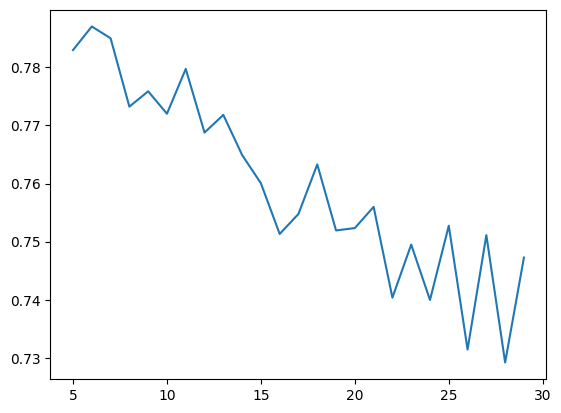

In [ ]:
#Plot accuracy scores for a single hidden layer with 5-30 hidden nodes
sns.lineplot(x=range(min_hidden_layer_size,max_hidden_layer_size,1), y=cv_scores)

The highest accuracy is when the number of nodes is 6. From 5-6 nodes increase, after this point, the accuracy score shows small drops and ups all the way to 30 nodes.

This indicates that the best way of predicting if a client will churn is building an ANN model with 6 nodes.

In [ ]:
#Rebuild model with Optimal Nodes
MLPC_model = MLPClassifier(hidden_layer_sizes=6, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, Y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_mlpc))
print(classification_report(Y_test,Y_pred_mlpc))

[[1416  169]
 [ 232  296]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1585
           1       0.64      0.56      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



There are 1416 True positive values, 169 False positives, 232 False negatives and 296 True negatives.

In [ ]:
#Roc_auc value
print('ROC AUC: ', roc_auc_score(Y_test,MLPC_model.predict(X_test)))

ROC AUC:  0.7310958560367077


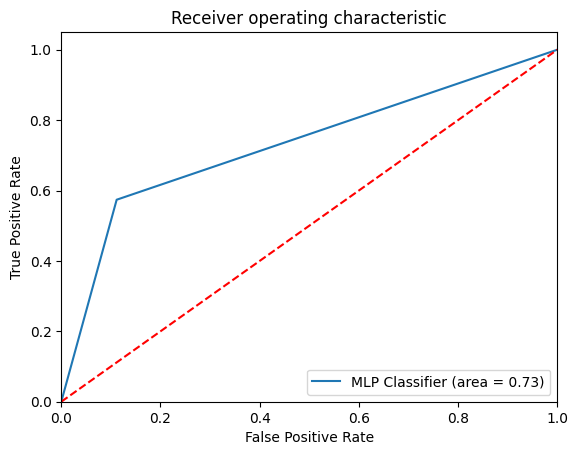

In [ ]:
#ROC MLP Classifier
mlp_roc_auc = roc_auc_score(Y_test,MLPC_model.predict(X_test))
mlp_fpr, mlp_tpr, mlp_thresholds = roc_curve(Y_test,MLPC_model.predict(X_test))

plt.figure()
plt.plot(mlp_fpr, mlp_tpr, label='MLP Classifier (area = %0.2f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [ ]:
#Reload data to create Keras based Deep Learning Model
import io
telco_data = pd.read_csv(io.BytesIO(uploaded['Telco-Customer-Churn.csv']))

In [ ]:
#Drop Customer ID attribute and TotalCharges because they do not add value to the study
telco_data = telco_data.drop(['customerID', 'TotalCharges'],axis=1)

#Drop variables that are not related to cellular service
telco_data = telco_data.drop(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],axis=1)

#Classify target variable into 1(churned) or 0(not churned)
telco_data.loc[telco_data['Churn'] == "Yes", 'Churn'] = 1
telco_data.loc[telco_data['Churn'] == "No", 'Churn'] = 0

#Classify other variables into 1 (Yes) or 0 (No)
telco_data.loc[telco_data['Partner'] == "Yes", 'Partner'] = 1
telco_data.loc[telco_data['Partner'] == "No", 'Partner'] = 0

telco_data.loc[telco_data['Dependents'] == "Yes", 'Dependents'] = 1
telco_data.loc[telco_data['Dependents'] == "No", 'Dependents'] = 0

telco_data.loc[telco_data['PhoneService'] == "Yes", 'PhoneService'] = 1
telco_data.loc[telco_data['PhoneService'] == "No", 'PhoneService'] = 0

telco_data.loc[telco_data['PaperlessBilling'] == "Yes", 'PaperlessBilling'] = 1
telco_data.loc[telco_data['PaperlessBilling'] == "No", 'PaperlessBilling'] = 0

In [ ]:
#Correct data type
telco_data['Churn'] =  telco_data['Churn'].astype('int64',copy=False)
telco_data['Partner'] =  telco_data['Partner'].astype('int64',copy=False)
telco_data['Dependents'] =  telco_data['Dependents'].astype('int64',copy=False)
telco_data['PhoneService'] =  telco_data['PhoneService'].astype('int64',copy=False)
telco_data['PaperlessBilling'] =  telco_data['PaperlessBilling'].astype('int64',copy=False)

In [ ]:
#Get dummies for categorical variables
telco_data = pd.get_dummies(telco_data)

In [ ]:
# Prepare features and labels
X = telco_data.drop('Churn',axis=1).values
Y = telco_data['Churn'].values

In [ ]:
# Split data 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
#Rescale the data for analysis
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(4930, 22)

In [ ]:
#Build SNN model with 3 hidden layers and 0.5 dropout

model = Sequential()
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

I am stopping half of the parameters per layer (0.5) to avoid overfitting

In [ ]:
#Create early stop callback
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
#Implement early stop to prevent overfitting
model.fit(x=X_train,
          y=Y_train,
          batch_size=128,
          epochs=100,
          validation_data=(X_test, Y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/100
39/39 [==============================] - 2s 10ms/step - loss: 0.6109 - val_loss: 0.5081
Epoch 2/100
39/39 [==============================] - 0s 5ms/step - loss: 0.5356 - val_loss: 0.4388
Epoch 3/100
39/39 [==============================] - 0s 5ms/step - loss: 0.5019 - val_loss: 0.4246
Epoch 4/100
39/39 [==============================] - 0s 5ms/step - loss: 0.4890 - val_loss: 0.4211
Epoch 5/100
39/39 [==============================] - 0s 4ms/step - loss: 0.4820 - val_loss: 0.4196
Epoch 6/100
39/39 [==============================] - 0s 6ms/step - loss: 0.4816 - val_loss: 0.4187
Epoch 7/100
39/39 [==============================] - 0s 4ms/step - loss: 0.4811 - val_loss: 0.4223
Epoch 8/100
39/39 [==============================] - 0s 5ms/step - loss: 0.4714 - val_loss: 0.4198
Epoch 9/100
39/39 [==============================] - 0s 4ms/step - loss: 0.4706 - val_loss: 0.4141
Epoch 10/100
39/39 [==============================] - 0s 5ms/step - loss: 0.4657 - val_loss: 0.4116
Epoch 11

<Axes: >

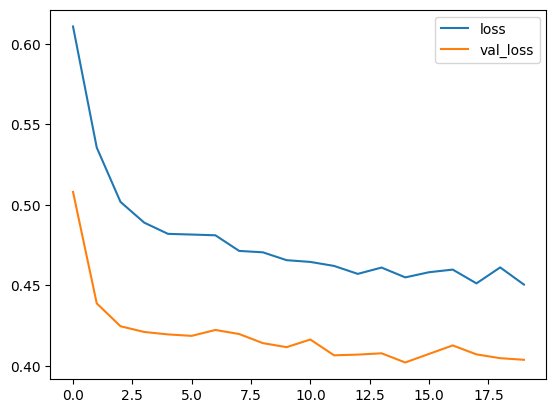

In [ ]:
#Plot training and validation losses versus epochs
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
Y_pred =(model.predict(X_test) > 0.5).astype("int32")

67/67 [==============================] - 0s 2ms/step


In [ ]:
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred))

[[1409  176]
 [ 223  305]]


There are 1409 True positive values, 176 False positive, 223 False negative and 305 True negative.

In [ ]:
#Classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1585
           1       0.63      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113



In [ ]:
#ROC AUC
print('ROC AUC: ', roc_auc_score(Y_test,model.predict(X_test)))

67/67 [==============================] - 0s 2ms/step
ROC AUC:  0.8565786014721346


67/67 [==============================] - 0s 1ms/step


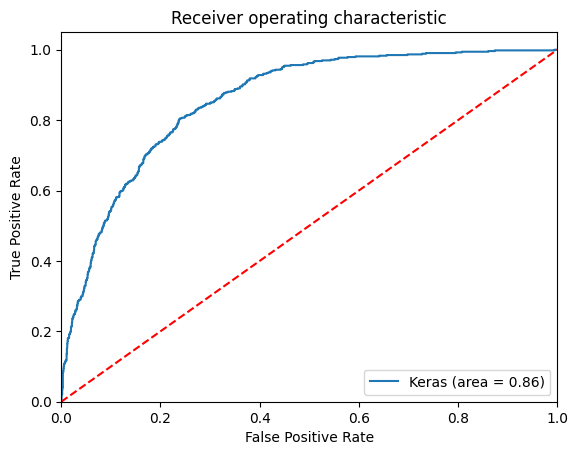

In [ ]:
#ROC Keras
k_roc_auc = roc_auc_score(Y_test,model.predict(X_test))
k_fpr, k_tpr, k_thresholds = roc_curve(Y_test,model.predict(X_test))

plt.figure()
plt.plot(k_fpr, k_tpr, label='Keras (area = %0.2f)' % k_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


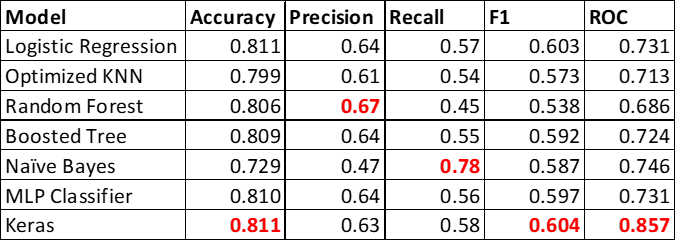

The highest accuracy metric is shown in Keras Model at 0.811.

The Precision metric to predict the probability of client churning (1) is higher in the Random Forest model.

The Recall metric to predict the probability of client churning (1) is higher in the Naive Bayes model.

The F-1 score metric to predict the probability of client churning (1) is higher in the Keras Model.

The highest ROC AUC is shown in the Keras Model with 85.7%

**Because the best metric to assess the performance of a model is ROC AUC, I conclude that the better model to predict the probability of client churning  is the Keras Model**

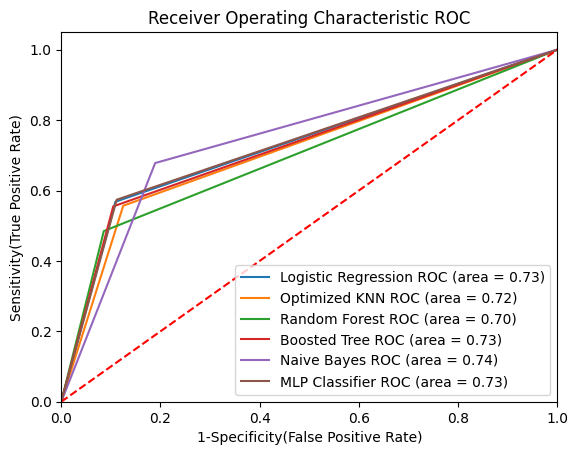

In [ ]:
from sklearn import metrics

plt.figure()

models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Optimized KNN',
    'model': KNeighborsClassifier(n_neighbors=81, metric= 'euclidean'),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(max_depth=5, random_state=0),
},
{
    'label': 'Boosted Tree',
    'model': AdaBoostClassifier(n_estimators=100),
},
{
    'label': 'Naive Bayes',
    'model': MultinomialNB(alpha=0.01),
},
{
    'label': 'MLP Classifier',
    'model': MLPClassifier(hidden_layer_sizes=6, activation='logistic', solver='adam', random_state=1),
}
]

# Below for loop iterates through the models mentioned in the list
for m in models:
    model = m['model']
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict(X_test))
# Calculate Area under the curve
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
# Plot values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic ROC')
plt.legend(loc="lower right")
plt.show()

**Recommendations**

When dealing with senior citizens, there must be a fixed price, or else the churn rate will increase with monthly charges.
The Tenure Churn rate shows that in the first 5 years with the cell phone company, there is a higher chance of them switching over to a new provider, therefore incentivize with loyalty programs or discounts when they join, and after one year.

Paperless billing means they cannot see exactly what they are being charged for their services, this has a correlation with senior citizens as sometimes they are not tech-savvy enough to see what they are being charged unless it is in print form. Keep this in mind moving forward. Also, send alerts every time a bill is created.

The threshold for a customer to pay for cell phone service is 60 dollars, incentivize them by offering a plan for $59 and go down from there, to pull in new clients.

The Most attractive contract is the Month-to-Month contract as it seems people do not want a direct commitment with one cell phone provider, but in terms of revenue, changing them to a one-year will decrease the churn rate and provide an opportunity to maybe true-up existing customers.

Launch a marketing campaign to switch customers from electronic checks to auto payment methods.
